<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Malicious_Address_Prediction/data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**column 'label' has values 1 - malicious , 0 - non-malicious**

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/project_data/malicious_prediction_data.csv')

In [0]:
df.shape

(534, 17)

In [0]:
non_m = df.loc[df['label'] == 0]
m = df.loc[df['label'] == 1]

In [0]:
print((non_m.shape))
print((m.shape))

(267, 17)
(267, 17)


In [0]:
def plot_hist(operation=None):
  # bins = numpy.linspace(-10, 10, 100)
  attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']

  
  k =0
  j=0
  if operation == None:   
    for i in range(4):
      j=0
      l=k
      if len(attributes)-l < 4:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
      else:
        fig, axs = plt.subplots(1,4,figsize=(15,5))
      for attr in attributes[l:l+4]:
      
        k+=1
        axs[j].hist(non_m[attr],  alpha=0.5, label='non_malicious')
        axs[j].hist(m[attr],  alpha=0.5, label='malicious')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        j+=1
  else:
    for i in range(4):
      j=0
      l=k
      if len(attributes)-l < 4:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
      else:
        fig, axs = plt.subplots(1,4,figsize=(15,5))
      for attr in attributes[l:l+4]:
        k+=1
        axs[j].hist(operation(non_m[attr]),  alpha=0.5, label='non_malicious')
        axs[j].hist(operation(m[attr]),  alpha=0.5, label='malicious')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        j+=1
    


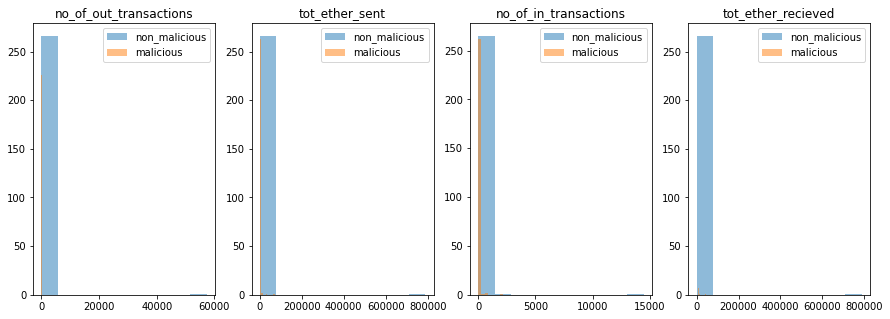

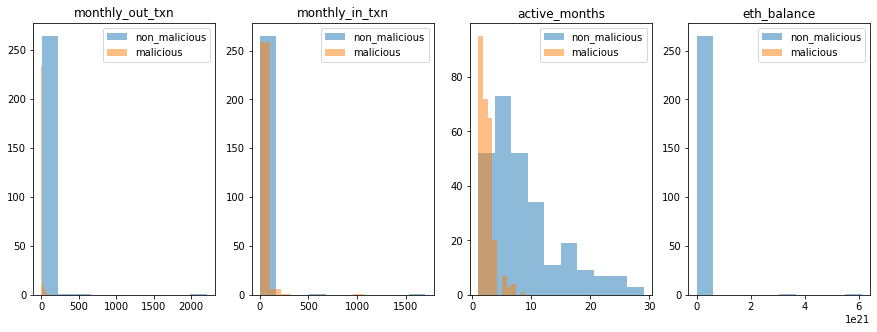

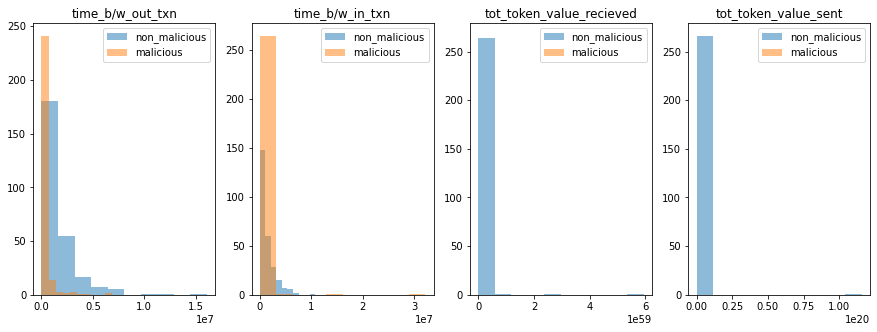

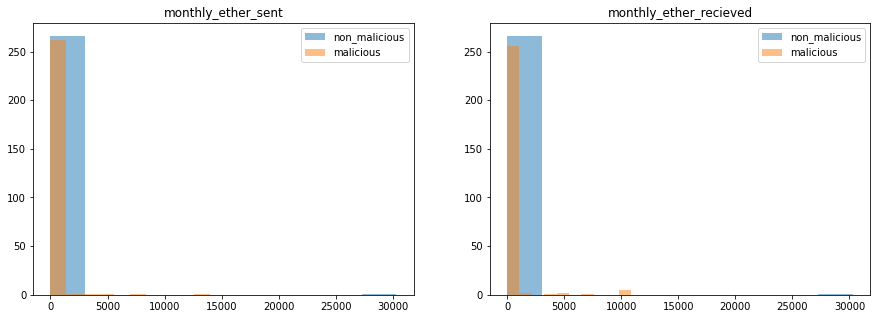

In [0]:
plot_hist()

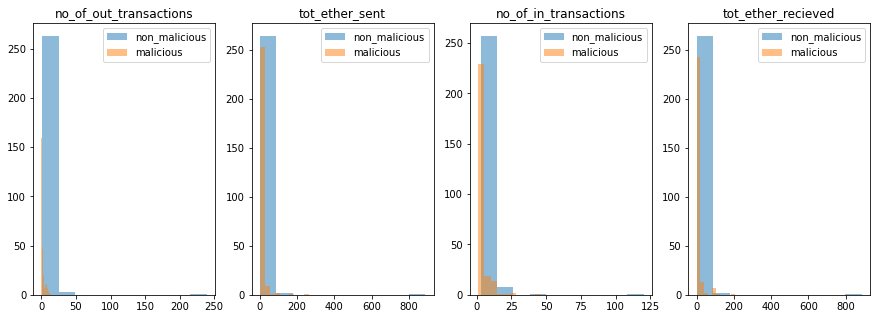

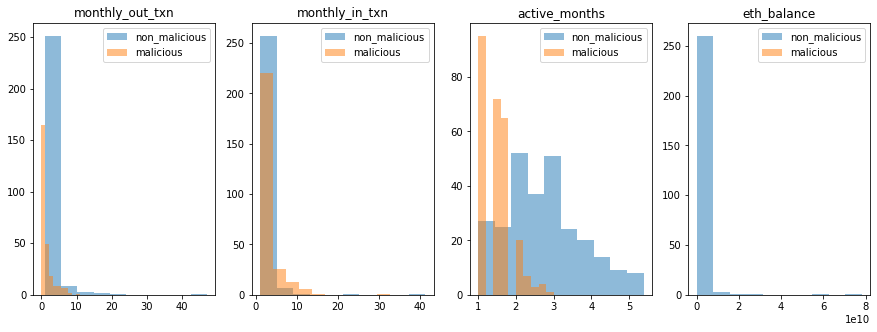

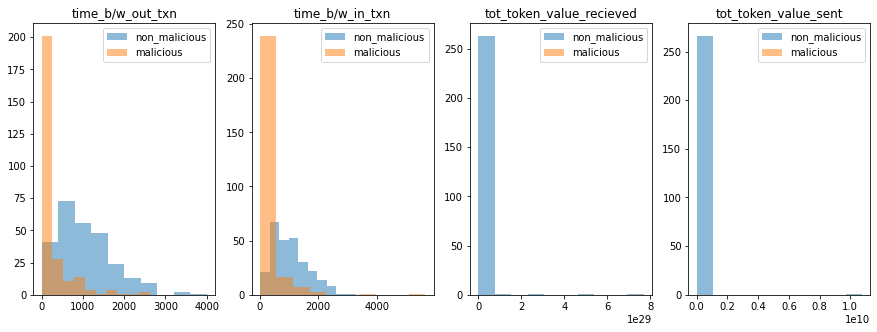

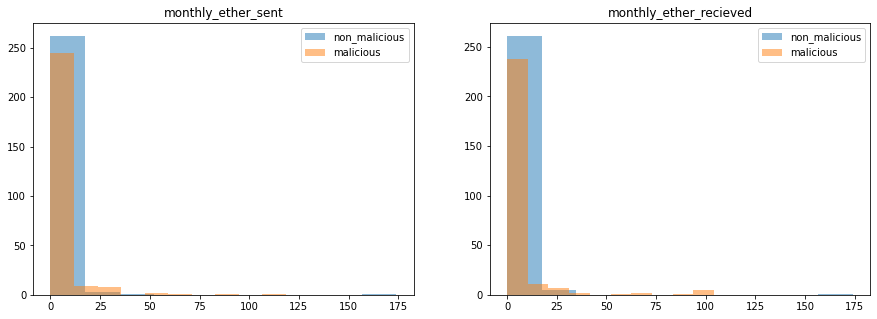

In [0]:
plot_hist(operation=np.sqrt)

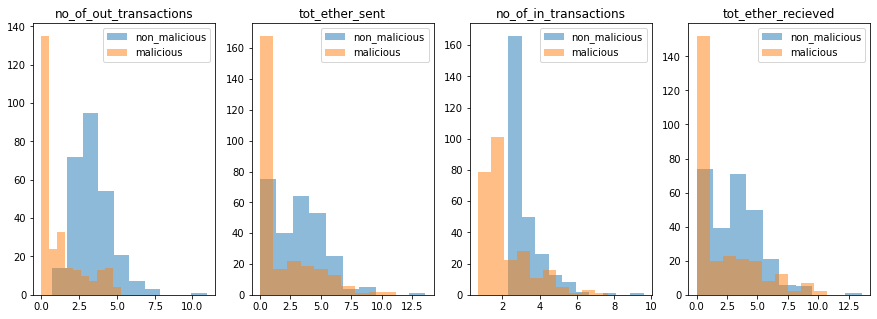

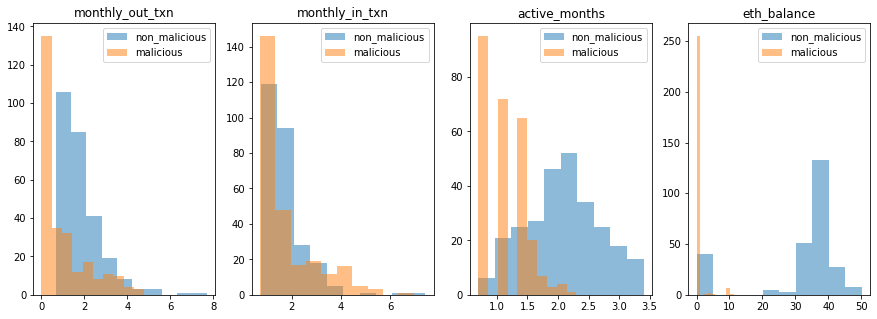

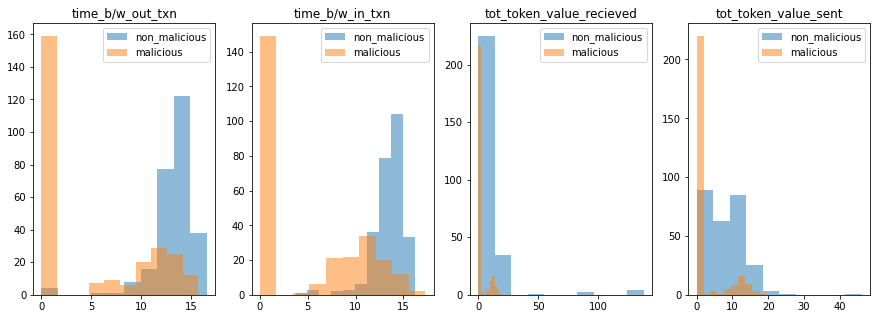

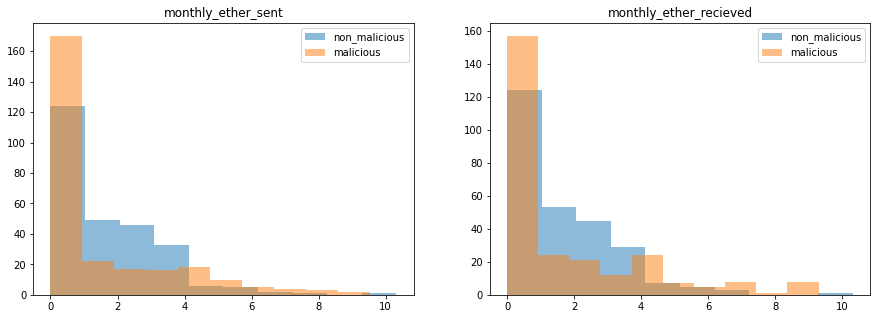

In [0]:
plot_hist(operation=np.log1p)

In [0]:
data = df.loc[:,'no_of_out_transactions':].copy()

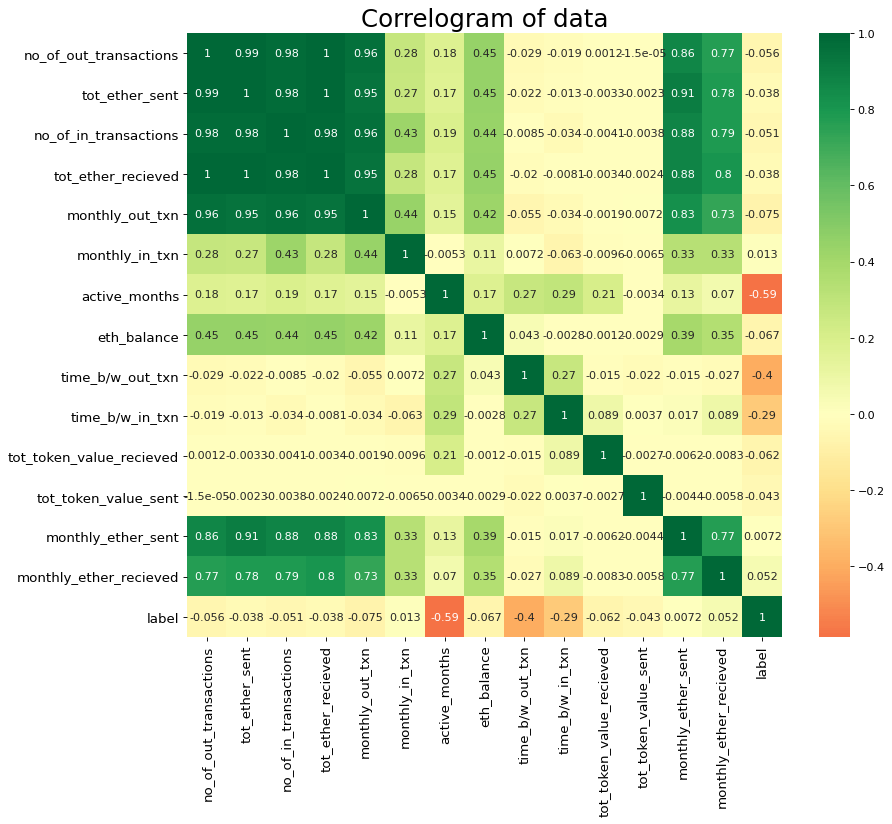

In [0]:
import seaborn as sns
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

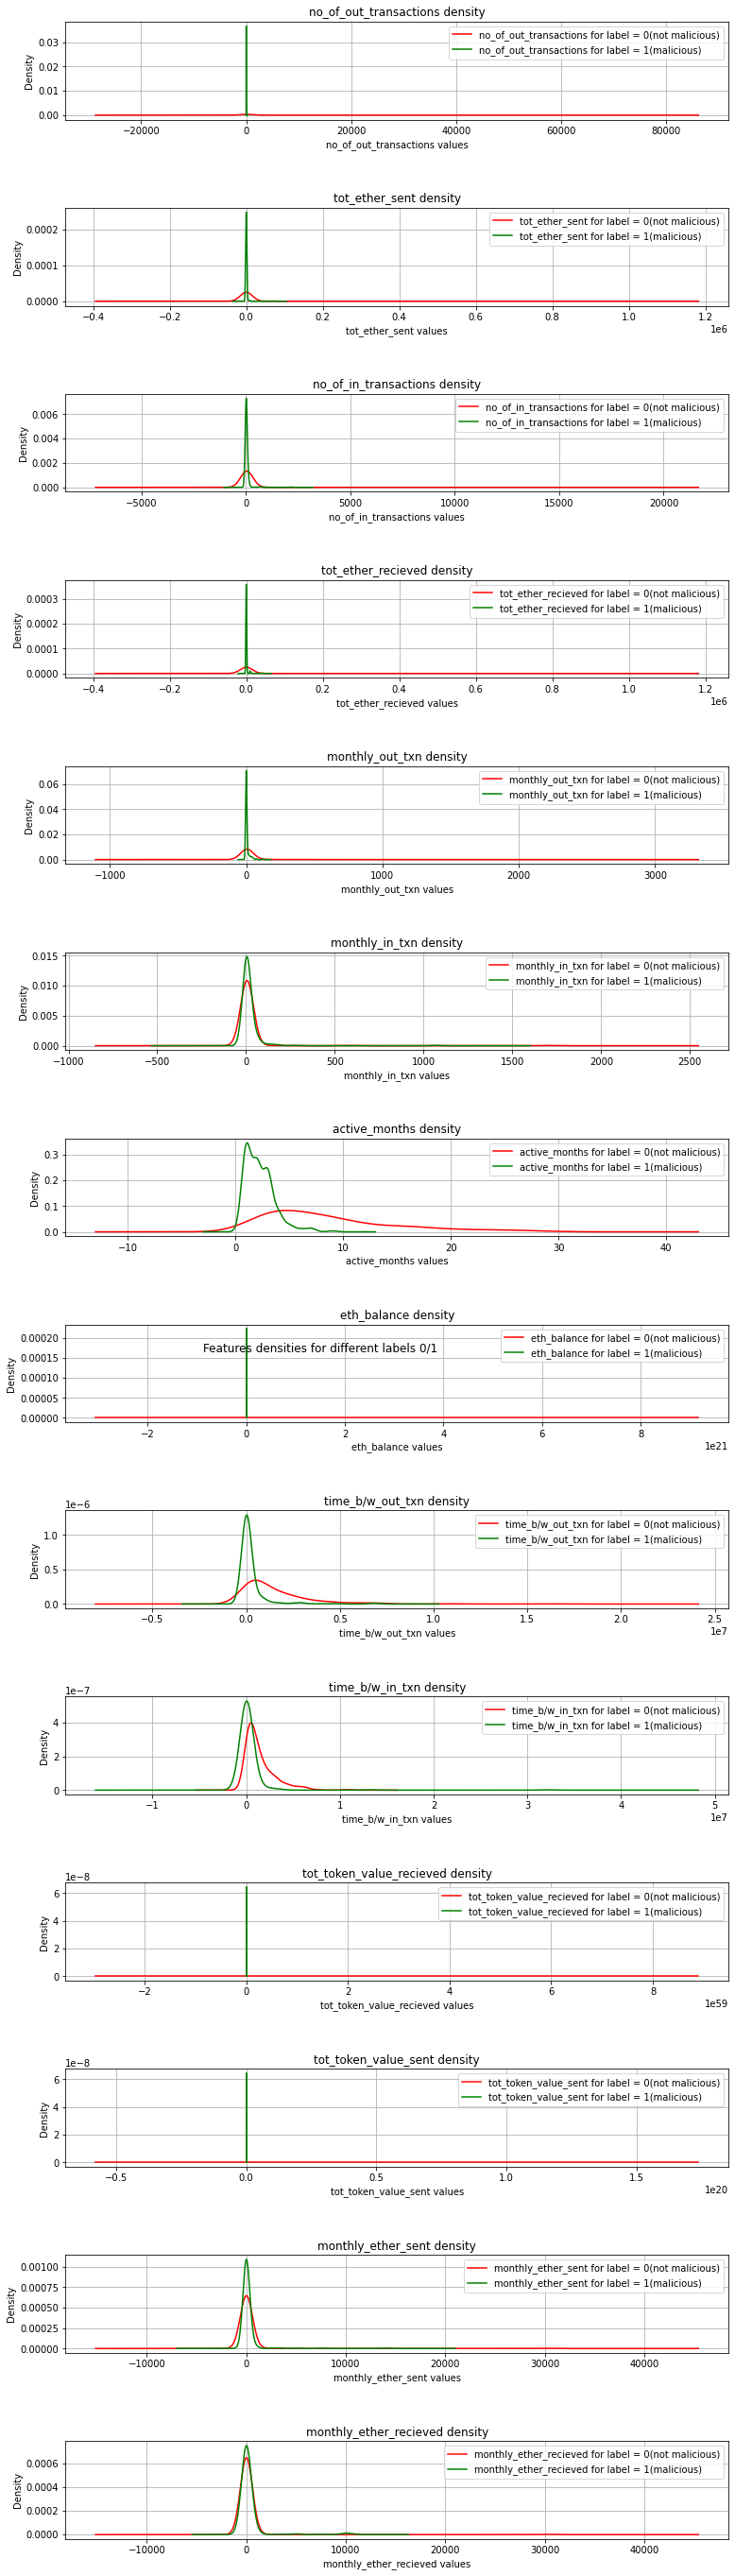

In [0]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_densities(data,names):
    '''
    Plot features densities depending on the label values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on label values 
    label_0 = data[data['label'] == 0]
    label_1 = data[data['label'] == 1]

    # init figure
    fig, axs = plt.subplots(14, 1)
    fig.suptitle('Features densities for different labels 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for labels
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        label_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for label = 0(not malicious)')
        label_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for label = 1(malicious)')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')

# load your data 
names = list(data.columns)
# plot correlation & densities
plot_densities(data,names)